In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [11]:
# Dataset directory (UPDATE THIS IF NEEDED)
data_dir = r"C:\Users\priya\OneDrive\Desktop\medtech\Lung cancer\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset"  # Replace with the exact name of your folder

# Define categories based on your dataset structure
categories = ["Bengin cases", "Malignant cases", "Normal cases"]

# Check paths
for category in categories:
    path = os.path.join(data_dir, category)
    if not os.path.exists(path):
        print(f"Warning: Path does not exist -> {path}")


In [12]:
data = []
labels = []
img_size = (224, 224)  # Standard image size

for idx, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    if not os.path.exists(path):
        continue  # Skip if folder is missing

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Skipping corrupted file: {img_path}")
            continue
        
        img = cv2.resize(img, img_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        
        data.append(img)
        labels.append(idx)

# Convert lists to numpy arrays
data = np.array(data) / 255.0  # Normalize pixel values
labels = np.array(labels)

# One-hot encode labels
labels = to_categorical(labels, num_classes=len(categories))

# Display dataset info
print(f"Loaded {len(data)} images.")


Loaded 1097 images.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Display dataset shapes
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (877, 224, 224, 3)
Testing data shape: (220, 224, 224, 3)


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer (3 classes)
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 0.5303 - loss: 0.9738 - val_accuracy: 0.6682 - val_loss: 0.8427
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step - accuracy: 0.6794 - loss: 0.7704 - val_accuracy: 0.7409 - val_loss: 0.6574
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - accuracy: 0.7527 - loss: 0.6254 - val_accuracy: 0.8000 - val_loss: 0.5384
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - accuracy: 0.8325 - loss: 0.4706 - val_accuracy: 0.8273 - val_loss: 0.4522
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 274ms/step - accuracy: 0.8695 - loss: 0.3872 - val_accuracy: 0.8636 - val_loss: 0.3132
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step - accuracy: 0.8911 - loss: 0.2958 - val_accuracy: 0.8909 - val_loss: 0.2407
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step - accuracy: 0.9126 - loss: 0.2513 - val_accuracy: 0.8955 - val_loss: 0.2125
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - accuracy: 0.9496 - loss: 0.1768 - val_accuracy: 0

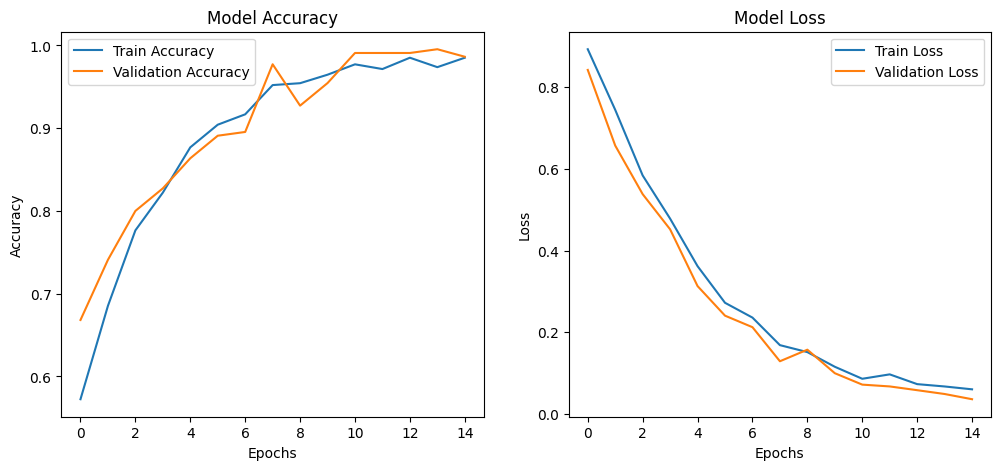

In [16]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9908 - loss: 0.0293
Test Accuracy: 98.64%


In [21]:
test_img_path = r"C:\Users\priya\OneDrive\Desktop\medtech\Lung cancer\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\Normal cases\N16-021.png"

In [22]:
def predict_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"Could not load image. Check the path: {image_path}")

    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return categories[class_index]


In [29]:
import os

test_img_path = r"C:\Users\priya\OneDrive\Desktop\medtech\Lung cancer\The IQ-OTHNCCD lung cancer dataset\The IQ-OTHNCCD lung cancer dataset\Normal cases\Normal case (41).jpg"
print(os.path.exists(test_img_path))


True


In [30]:
predicted_class = predict_image(test_img_path)
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted Class: Normal cases


In [31]:
# Save the model in .h5 format
model.save("lung_cancer_detection_model.h5")
print("Model saved successfully as lung_cancer_detection_model.h5")


Model saved successfully as lung_cancer_detection_model.h5
